<a href="https://colab.research.google.com/github/qianjing2020/DS-Unit-2-Linear-Models/blob/master/JingQian_assignment_regression_classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [0]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [4]:
df.tail(99)

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
49253,1.0,0,2016-04-13 01:10:29,"Location, location, location! Spacious studio ...",West 23rd Street,40.7441,-73.9964,2475,208 West 23rd Street,low,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49254,1.0,1,2016-04-02 03:13:44,For more info on this unit and/or others like ...,E 88 Street,40.7769,-73.9456,2250,506 E 88 Street,low,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49255,1.0,2,2016-04-30 02:20:23,Ideal living in the East Village. Elevator bui...,East 7th Street,40.7266,-73.9845,3300,111 East 7th Street,low,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49256,1.0,2,2016-04-14 12:44:05,"Absolutely stunning, extremely large 2 bedroom...",Bay Ridge Parkway,40.6211,-74.0093,2195,1220 Bay Ridge Parkway,medium,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
49257,1.0,2,2016-04-18 02:59:51,"***ABSOLUTELY GORGEOEOUS*** conv 2BD/1BA ,Cust...",10th Avenue,40.7593,-73.9959,3450,561 10th Avenue,medium,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49347,1.0,2,2016-06-02 05:41:05,"30TH/3RD, MASSIVE CONV 2BR IN LUXURY FULL SERV...",E 30 St,40.7426,-73.9790,3200,230 E 30 St,medium,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
49348,1.0,1,2016-04-04 18:22:34,"HIGH END condo finishes, swimming pool, and ki...",Rector Pl,40.7102,-74.0163,3950,225 Rector Place,low,1,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
49349,1.0,1,2016-04-16 02:13:40,Large Renovated One Bedroom Apartment with Sta...,West 45th Street,40.7601,-73.9900,2595,341 West 45th Street,low,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49350,1.0,0,2016-04-08 02:13:33,Stylishly sleek studio apartment with unsurpas...,Wall Street,40.7066,-74.0101,3350,37 Wall Street,low,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df.describe()

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.00000,48818.000000,48818.000000
mean,1.201790,1.537158,40.750756,-73.972758,3579.560982,0.524827,0.478266,0.478266,0.447622,0.424843,0.415072,0.367078,0.052767,0.268446,0.185649,0.175898,0.132758,0.138392,0.102831,0.087201,0.060469,0.055205,0.051907,0.046192,0.043304,0.042710,0.03933,0.027224,0.026240
std,0.470707,1.106078,0.038962,0.028887,1762.420875,0.499388,0.499533,0.499533,0.497254,0.494324,0.492740,0.482013,0.223571,0.443156,0.388827,0.380737,0.339317,0.345314,0.303741,0.282133,0.238357,0.228382,0.221842,0.209903,0.203542,0.202204,0.19438,0.162736,0.159851
min,0.000000,0.000000,40.571200,-74.087300,1375.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,1.000000,40.728300,-73.991800,2500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,40.751700,-73.978000,3150.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,2.000000,40.774000,-73.955000,4095.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,10.000000,8.000000,40.989400,-73.700100,15500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the Model to new data: For supervised learning, often we predict labels for unknown data using the predict() method.

In [0]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
features = ['bathrooms']
target = 'price'
X_train = df[features]
y = df[target]

In [9]:
model.fit(X_train, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
def predict_apartment_price(input_bathrooms):
  y_pred = model.predict([[input_bathrooms]])
  estimate = y_pred[0]
  coefficient = model.coef_[0]
  result = f'${estimate:,.0f} is the estimated cost for an apartment with {input_bathrooms:.0f} in NYC.'
  explanation = f'In this linear regression, each addtional bathroom adds ${coefficient:,.0f} to the apartment total cost.'
  print(result + '\n' + explanation)

X_test = 4
y_pred = predict_apartment_price(X_test)

$10,780 is the estimated cost for an apartment with 4 in NYC.
In this linear regression, each addtional bathroom adds $2,573 to the apartment total cost.


In [11]:
from ipywidgets import interact
interact(predict_apartment_price, input_bathrooms = (df['bathrooms'].min(), df['bathrooms'].max()));

interactive(children=(FloatSlider(value=5.0, description='input_bathrooms', max=10.0), Output()), _dom_classes…

Now use more features in predict model

Select a few features by guessing

In [12]:
# train model with multiple features
features = ['bathrooms', 'bedrooms', 'longitude', 'latitude', 'doorman','swimming_pool']
X_train = df[features]
model.fit(X_train,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
import numpy as np
X_test = np.array([2, 3, 40.751700, -73.978000, 1, 1])
X_test = X_test.reshape(1,-1)
print(X_test.shape)

y_pred = model.predict(X_test)
print(y_pred)

(1, 6)
[-1779253.77217609]


In [0]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_train,y, train_size=.8,\
                                                test_size=.2,random_state =1)

In [15]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(39054, 6)
(9764, 6)
(39054,)
(9764,)


In [16]:
model.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

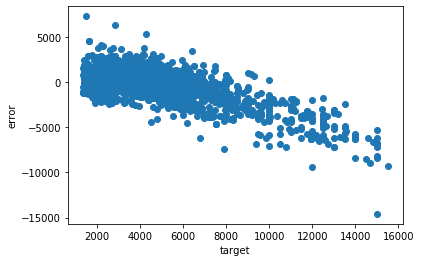

In [17]:
# plot the error vs value
ypred = model.predict(Xtest)
error = ypred-ytest
import matplotlib.pyplot as plt
figure = plt.figure()
ax = plt.scatter(ytest,error) 
plt.xlabel('target')
plt.ylabel('error')
plt.show()

In [18]:
model = LinearRegression(normalize=True)
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)
ypred.shape
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.metrics import mean_absolute_error, max_error
print(f'R2 = {r2_score(ytest, ypred):.5f}')
print(f'Explained variance = {explained_variance_score(ytest,ypred):.5f}')
print(f'Mean absolute error = {mean_absolute_error(ytest,ypred):.5f}')
print(f'Max error = {max_error(ytest,ypred):.5f}')

R2 = 0.59797
Explained variance = 0.59797
Mean absolute error = 712.25484
Max error = 14591.34599


In [19]:
model = LinearRegression(normalize=False)
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)
ypred.shape

print(f'R2 = {r2_score(ytest, ypred):.5f}')
print(f'Explained variance = {explained_variance_score(ytest,ypred):.5f}')
print(f'Mean absolute error = {mean_absolute_error(ytest,ypred):.5f}')
print(f'Max error = {max_error(ytest,ypred):.5f}')

R2 = 0.59797
Explained variance = 0.59797
Mean absolute error = 712.25484
Max error = 14591.34599


In [0]:
# compare above model, why normalization didn't improve the model???

Try some automation feature selection tool!

In [0]:
import featuretools as ft